In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

api_key = 'R8QIQBLESTB8SZW7'
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN"]

def get_price_data(symbol):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey={api_key}'
    r = requests.get(url)
    raw_df = r.json()
    res = pd.DataFrame(raw_df['Time Series (Daily)']).T
    res = res[['4. close']]
    res.rename(columns={'4. close': f'{symbol}', 'index': 'date'}, inplace=True)
    return res

In [2]:
prices = []

for symbol in symbols:
    prices.append(get_price_data(symbol))
    
df = pd.concat([prices[0], prices[1], prices[2], prices[3]], axis=1)

df

,AAPL,MSFT,GOOGL,AMZN
2021-11-24,161.94,337.91,2922.4,3580.41
2021-11-23,161.41,337.68,2915.64,3580.04
2021-11-22,161.02,339.83,2926.04,3572.57
2021-11-19,160.55,343.11,2978.53,3676.57
2021-11-18,157.87,341.27,2996.77,3696.06
...,...,...,...,...
1999-11-05,88.31,91.56,NaN,64.94
1999-11-04,83.62,91.75,NaN,63.06
1999-11-03,81.5,92.0,NaN,65.81
1999-11-02,80.25,92.56,NaN,66.44


In [3]:
df.reset_index(inplace=True)
df

,index,AAPL,MSFT,GOOGL,AMZN
0,2021-11-24,161.94,337.91,2922.4,3580.41
1,2021-11-23,161.41,337.68,2915.64,3580.04
2,2021-11-22,161.02,339.83,2926.04,3572.57
3,2021-11-19,160.55,343.11,2978.53,3676.57
4,2021-11-18,157.87,341.27,2996.77,3696.06
...,...,...,...,...,...
5549,1999-11-05,88.31,91.56,NaN,64.94
5550,1999-11-04,83.62,91.75,NaN,63.06
5551,1999-11-03,81.5,92.0,NaN,65.81
5552,1999-11-02,80.25,92.56,NaN,66.44


In [4]:
df.rename(columns={'index':'date'}, inplace=True)
df

,date,AAPL,MSFT,GOOGL,AMZN
0,2021-11-24,161.94,337.91,2922.4,3580.41
1,2021-11-23,161.41,337.68,2915.64,3580.04
2,2021-11-22,161.02,339.83,2926.04,3572.57
3,2021-11-19,160.55,343.11,2978.53,3676.57
4,2021-11-18,157.87,341.27,2996.77,3696.06
...,...,...,...,...,...
5549,1999-11-05,88.31,91.56,NaN,64.94
5550,1999-11-04,83.62,91.75,NaN,63.06
5551,1999-11-03,81.5,92.0,NaN,65.81
5552,1999-11-02,80.25,92.56,NaN,66.44


In [5]:
df.dtypes

date     object
AAPL     object
MSFT     object
GOOGL    object
AMZN     object
dtype: object

In [6]:
df["AAPL"] = df.AAPL.astype(float)
df["MSFT"] = df.MSFT.astype(float)
df["GOOGL"] = df.GOOGL.astype(float)
df['AMZN'] = df.AMZN.astype(float)
#df['date'] =  pd.to_datetime(df['date'], format='%Y-%M-%d')
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [7]:
df.dtypes

date     datetime64[ns]
AAPL            float64
MSFT            float64
GOOGL           float64
AMZN            float64
dtype: object

In [8]:
df2 = pd.melt(df, id_vars=['date'], value_vars=['AAPL', 'MSFT', 'GOOGL', 'AMZN'])
df2

,date,variable,value
0,2021-11-24,AAPL,161.94
1,2021-11-23,AAPL,161.41
2,2021-11-22,AAPL,161.02
3,2021-11-19,AAPL,160.55
4,2021-11-18,AAPL,157.87
...,...,...,...
22211,1999-11-05,AMZN,64.94
22212,1999-11-04,AMZN,63.06
22213,1999-11-03,AMZN,65.81
22214,1999-11-02,AMZN,66.44


In [9]:
fig = px.line(df2, x="date", y="value", color='variable')
fig.show()

In [10]:
#df.isnull().sum()

In [11]:
#df.dropna(inplace=True)
#df

In [12]:
#df.isnull().sum()

In [13]:
amzn = df[['AMZN']]
amzn

,AMZN
0,3580.41
1,3580.04
2,3572.57
3,3676.57
4,3696.06
...,...
5549,64.94
5550,63.06
5551,65.81
5552,66.44


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X=amzn

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled

array([[0.95946787],
       [0.95936856],
       [0.95736343],
       ...,
       [0.01606253],
       [0.01623164],
       [0.0169537 ]])

In [16]:
df_X_scaled = pd.DataFrame(X_scaled, columns=['AMZN'])
df_X_scaled

,AMZN
0,0.959468
1,0.959369
2,0.957363
3,0.985280
4,0.990511
...,...
5549,0.015829
5550,0.015324
5551,0.016063
5552,0.016232


In [17]:
train_size = 0.8
index = round(train_size*X.shape[0])
X_scaled_train = df_X_scaled.iloc[:index]
X_scaled_test = df_X_scaled.iloc[index:]

In [18]:
print(X_scaled_train.shape)
print(X_scaled_test.shape)

(4443, 1)
(1111, 1)


In [19]:
X_train = []
y_train = []
for i in range(30, 4442):
    X_train.append(X_scaled_train.iloc[i-30:i, 0])
    y_train.append(X_scaled_train.iloc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
X_test = []
y_test = []
for i in range(30, 1111):
    X_test.append(X_scaled_test.iloc[i-30:i, 0])
    y_test.append(X_scaled_test.iloc[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
X_test.shape

(1081, 30, 1)

In [22]:
X_train.shape

(4412, 30, 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

First model test

In [24]:
def inverse_transformer(y):
    y = np.c_[y, np.ones(len(y))]
    y = scaler.inverse_transform(y)
    y = y[:,0]
    return y

In [25]:
es = EarlyStopping(patience=30, restore_best_weights=True)

test_regressor = Sequential()

test_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

test_regressor.add(LSTM(units = 50, return_sequences = True))

test_regressor.add(LSTM(units = 50, return_sequences = True))

test_regressor.add(LSTM(units = 50))

test_regressor.add(Dense(units = 1))

test_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

test_regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.3, callbacks=[es])

Epoch 1/100
97/97 [==============================] - 13s 60ms/step - loss: 0.0071 - val_loss: 1.3435e-04
Epoch 2/100
97/97 [==============================] - 4s 40ms/step - loss: 5.9279e-04 - val_loss: 9.5993e-05
Epoch 3/100
97/97 [==============================] - 4s 40ms/step - loss: 6.1565e-04 - val_loss: 7.5699e-05
Epoch 4/100
97/97 [==============================] - 4s 40ms/step - loss: 5.3035e-04 - val_loss: 1.9161e-05
Epoch 5/100
97/97 [==============================] - 4s 40ms/step - loss: 5.1624e-04 - val_loss: 1.6941e-04
Epoch 6/100
97/97 [==============================] - 4s 40ms/step - loss: 4.5195e-04 - val_loss: 3.2038e-05
Epoch 7/100
97/97 [==============================] - 4s 40ms/step - loss: 4.7950e-04 - val_loss: 2.4402e-06
Epoch 8/100
97/97 [==============================] - 4s 40ms/step - loss: 6.4920e-04 - val_loss: 2.5608e-06
Epoch 9/100
97/97 [==============================] - 4s 40ms/step - loss: 4.1541e-04 - val_loss: 7.7096e-06
Epoch 10/100
97/97 [===========

In [26]:
test_predicted_stock_price = test_regressor.predict(X_test)
test_predicted_stock_price = scaler.inverse_transform(test_predicted_stock_price)
y_test_transformed = inverse_transformer(y_test)

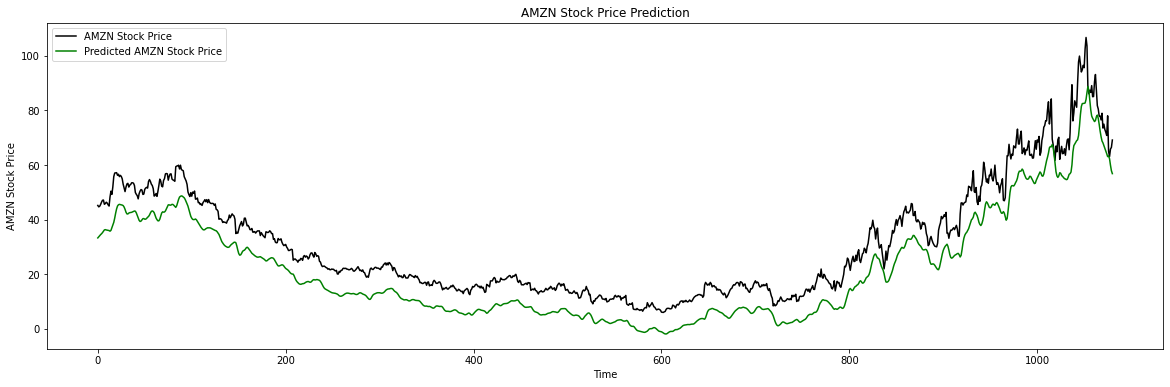

In [27]:
plt.figure(figsize=(20, 6))
plt.plot(y_test_transformed, color = 'black', label = 'AMZN Stock Price')
plt.plot(test_predicted_stock_price, color = 'green', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

Now with improved model

In [28]:
es = EarlyStopping(patience=30, restore_best_weights=True)

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.3, callbacks=[es])

Epoch 1/100
97/97 [==============================] - 13s 59ms/step - loss: 0.0065 - val_loss: 3.4524e-05
Epoch 2/100
97/97 [==============================] - 4s 41ms/step - loss: 0.0022 - val_loss: 1.3667e-05
Epoch 3/100
97/97 [==============================] - 4s 41ms/step - loss: 0.0020 - val_loss: 3.8027e-05
Epoch 4/100
97/97 [==============================] - 4s 41ms/step - loss: 0.0019 - val_loss: 8.3767e-05
Epoch 5/100
97/97 [==============================] - 4s 41ms/step - loss: 0.0016 - val_loss: 2.4429e-06
Epoch 6/100
97/97 [==============================] - 4s 41ms/step - loss: 0.0019 - val_loss: 3.2308e-06
Epoch 7/100
97/97 [==============================] - 4s 41ms/step - loss: 0.0014 - val_loss: 9.8569e-05
Epoch 8/100
97/97 [==============================] - 4s 41ms/step - loss: 0.0016 - val_loss: 2.7420e-06
Epoch 9/100
97/97 [==============================] - 4s 41ms/step - loss: 0.0014 - val_loss: 1.6229e-04
Epoch 10/100
97/97 [==============================] - 4s 40ms/s

In [29]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_transformed = inverse_transformer(y_test)

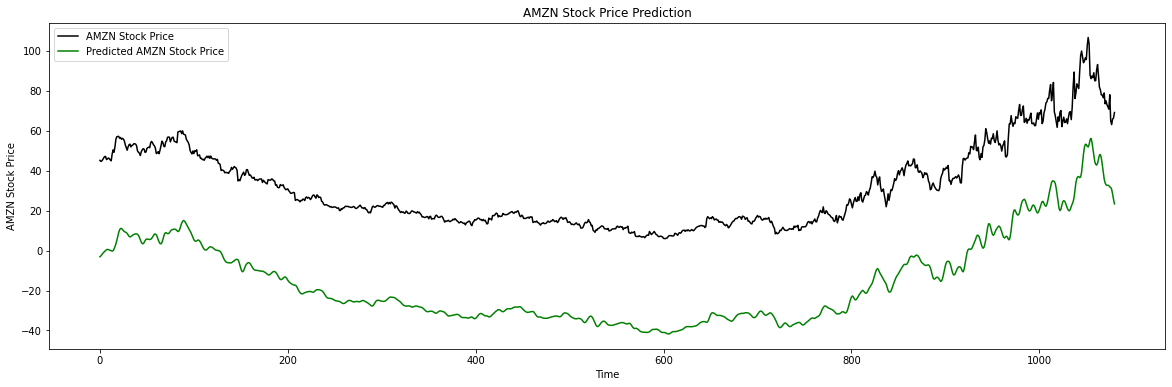

In [30]:
plt.figure(figsize=(20, 6))
plt.plot(y_test_transformed, color = 'black', label = 'AMZN Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()